###Assignment - 2

In [1]:
#1 
#Dataset downloaded
#Uploading the dataset

from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [86]:
#2
#Loading the dataset

import pandas as pd
import numpy as np

df = pd.read_csv(r'Churn_Modelling.csv')
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


Text(0, 0.5, 'Count')

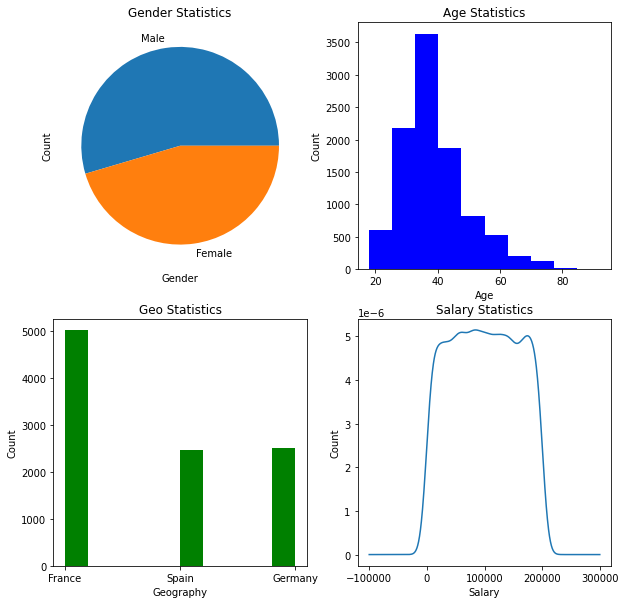

In [87]:
#3 Univariate analysis

import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
counts = df['Gender'].value_counts()
plt.subplot(221)
plt.pie(counts, labels = counts.index)
plt.title('Gender Statistics')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.subplot(222)
plt.hist(df['Age'],color='blue')
plt.title('Age Statistics')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(223)
plt.hist(df['Geography'],color='green')
plt.title('Geo Statistics')
plt.xlabel('Geography')
plt.ylabel('Count')

plt.subplot(224)
df['EstimatedSalary'].plot(kind='density')
plt.title('Salary Statistics')
plt.xlabel('Salary')
plt.ylabel('Count')


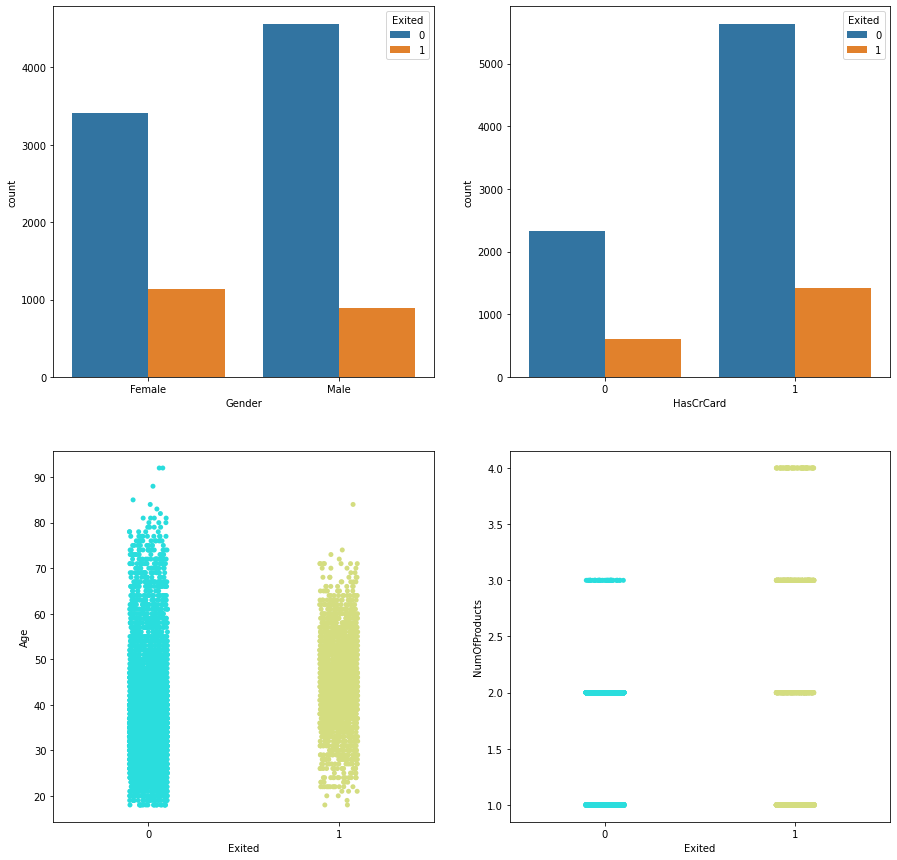

In [88]:
#3 Bivariate Analysis
import seaborn as sns

plt.figure(figsize=(15,15))

#Categorical vs Categorical
plt.subplot(2,2,1)
sns.countplot(data = df, x = 'Gender', hue = 'Exited')

plt.subplot(2,2,2)
sns.countplot(data = df, x = 'HasCrCard', hue = 'Exited')

#Continuous vs Continuous
plt.subplot(2,2,3)
sns.stripplot(x='Exited', y='Age', data=df, palette='rainbow')

plt.subplot(2,2,4)
sns.stripplot(x='Exited', y='NumOfProducts', data=df, palette='rainbow')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe6a743ba90>,
      dtype=object)

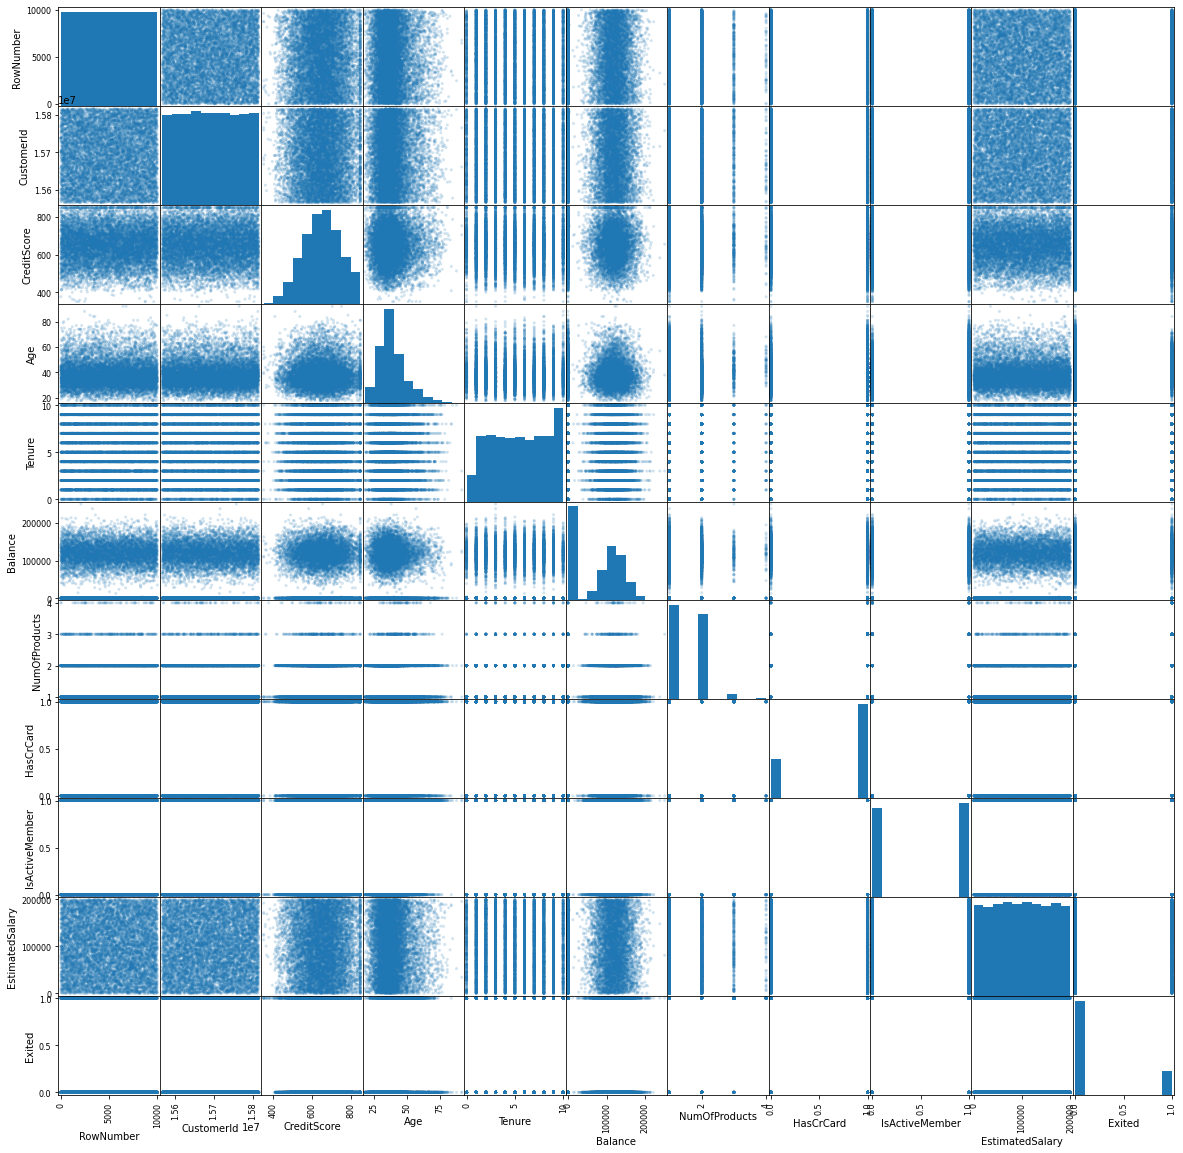

In [89]:
#3 Multivariate Analysis

pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(20,20))

In [90]:
#4
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [92]:
#5 Handling missing values

df.isnull().sum()    

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [93]:
#For Continuous variables
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['CreditScore'].fillna(df['CreditScore'].mean(), inplace=True)
df['Tenure'].fillna(df['Tenure'].mean(), inplace=True)
df['NumOfProducts'].fillna(df['NumOfProducts'].mean(), inplace=True)
df['EstimatedSalary'].fillna(df['EstimatedSalary'].mean(), inplace=True)

#Condisering 0s as missing values here
df['Balance'] = df['Balance'].replace(0, np.NaN)
df['Balance'] = df['Balance'].replace(np.NaN,df['Balance'].mean())

#For Categorical variables
df['Gender'].fillna(df['Gender'].mode(), inplace=True)
df['Geography'].fillna(df['Geography'].mode(), inplace=True)
df['HasCrCard'].fillna(df['HasCrCard'].mode(), inplace=True)
df['IsActiveMember'].fillna(df['IsActiveMember'].mode(), inplace=True)
df['Exited'].fillna(df['Exited'].mode(), inplace=True)


In [94]:
#Ensuring again
print(df.isnull().sum())  

print('\n\nGender : ', df['Gender'].unique())
print('Geography : ', df['Geography'].unique())
print('HasCrCard : ', df['HasCrCard'].unique())
print('IsActiveMember : ', df['IsActiveMember'].unique())
print('Exited : ', df['Exited'].unique())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


Gender :  ['Female' 'Male']
Geography :  ['France' 'Spain' 'Germany']
HasCrCard :  [1 0]
IsActiveMember :  [1 0]
Exited :  [1 0]


No. of Outliers :  464


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


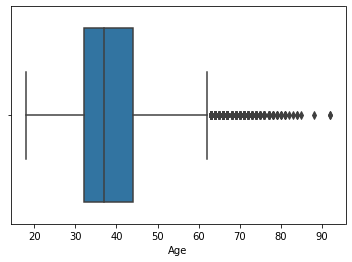

In [95]:
#6 Outlier detection - box plot
import seaborn as sns
sns.boxplot(df['Age'])
print('No. of Outliers : ', (df['Age'] > 60).sum())

In [96]:
#6 Outlier detection - zscore
from scipy import stats
zscore = np.abs(stats.zscore(df['NumOfProducts']))
print(zscore)
print('No. of Outliers : ', np.shape(np.where(zscore>3)))

0       0.911583
1       0.911583
2       2.527057
3       0.807737
4       0.911583
          ...   
9995    0.807737
9996    0.911583
9997    0.911583
9998    0.807737
9999    0.911583
Name: NumOfProducts, Length: 10000, dtype: float64
No. of Outliers :  (1, 60)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


No. of Outliers :  0


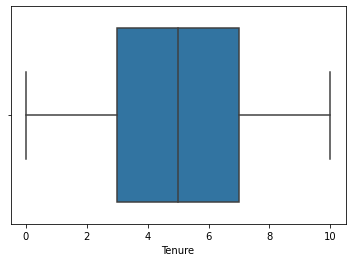

In [97]:
#6 Outlier detection - box plot
sns.boxplot(df['Tenure'])
print('No. of Outliers : ', (df['Tenure'] > 10).sum())

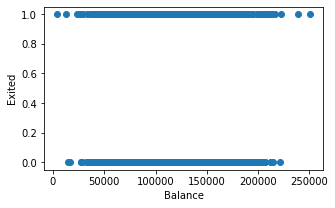

In [98]:
#6 Outlier detection - Scatter plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (5,3))
ax.scatter(df['Balance'], df['Exited'])
 
# x-axis label
ax.set_xlabel('Balance')
 
# y-axis label
ax.set_ylabel('Exited')
plt.show()

In [99]:
#6 Outlier detection - IQR
Q1 = df['EstimatedSalary'].quantile(0.25)
Q3 = df['EstimatedSalary'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
upper=Q3 + 1.5 * IQR
lower=Q1 - 1.5 * IQR
count = np.size(np.where(df['EstimatedSalary'] >upper))
count = count + np.size(np.where(df['EstimatedSalary'] <lower))
print('No. of outliers : ', count)

98386.1375
No. of outliers :  0


In [100]:
#6 Outlier detection - 3 sigma

upper = df.CreditScore.mean() + (3 * df.CreditScore.std())
lower = df.CreditScore.mean() - (3 * df.CreditScore.std())
columns = df[ ( df['CreditScore'] > upper ) | ( df['CreditScore']<lower ) ]
print('Upper range : ', upper)
print('Lower range : ', lower)
print('No. of Outliers : ', len(columns))

Upper range :  940.488696208391
Lower range :  360.568903791609
No. of Outliers :  8


In [101]:
#6 Removing Outliers
columns = ['NumOfProducts', 'Tenure',  'Age', 'Balance', 'CreditScore', 'EstimatedSalary']

for i in columns:
        Q1=df[i].quantile(0.25)
        Q3=df[i].quantile(0.75)
        IQR=Q3-Q1
        upper=Q3+1.5*IQR
        lower=Q1-1.5*IQR
        df[i]=np.where(df[i] >upper, upper, df[i])
        df[i]=np.where(df[i] <lower, lower, df[i])

In [102]:
#After outlier removal
columns = ['NumOfProducts', 'Tenure',  'Age', 'Balance', 'CreditScore', 'EstimatedSalary']

for i in columns:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1
  upper=Q3 + 1.5 * IQR
  lower=Q1 - 1.5 * IQR
  count = np.size(np.where(df[i] >upper))
  count = count + np.size(np.where(df[i] <lower))
  print('No. of outliers in ', i, ' : ', count)

No. of outliers in  NumOfProducts  :  0
No. of outliers in  Tenure  :  0
No. of outliers in  Age  :  0
No. of outliers in  Balance  :  0
No. of outliers in  CreditScore  :  0
No. of outliers in  EstimatedSalary  :  0


In [103]:
#7  Label Encoding
print('Before encoding : ', df['Surname'][0])
df['Surname'] = df['Surname'].astype('category')

df['Surname'] = df['Surname'].cat.codes
print('After encoding : ', df['Surname'][0])

df['Surname'].dtype

Before encoding :  Hargrave
After encoding :  1115


dtype('int16')

In [104]:
#7 Label encoding
print('Before encoding : ', df['Geography'][10])
df['Geography'] = df['Geography'].astype('category')

df['Geography'] = df['Geography'].cat.codes
print('After encoding : ', df['Geography'][10])

df['Geography'].dtype

Before encoding :  France
After encoding :  0


dtype('int8')

In [105]:
#7 One hot encoding
print('Before encoding : ', df['Gender'][20])
one_hot = pd.get_dummies(df['Gender'])
df = df.drop('Gender', axis = 1)
df = df.join(one_hot)

Before encoding :  Male


In [106]:
print('After encoding')
df.head(2)

After encoding


,RowNumber,CustomerId,Surname,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male
0,1,15634602,1115,619.0,0,42.0,2.0,119827.493793,1.0,1,1,101348.88,1,1,0
1,2,15647311,1177,608.0,2,41.0,1.0,87486.458750,1.0,0,1,112542.58,0,1,0


In [107]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname              int16
CreditScore        float64
Geography             int8
Age                float64
Tenure             float64
Balance            float64
NumOfProducts      float64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
Female               uint8
Male                 uint8
dtype: object

In [108]:
#Removing unnecessary columns

df = df.drop('RowNumber', axis = 1)
df = df.drop('Surname', axis = 1)
df = df.drop('CustomerId', axis = 1)

In [109]:
#Changing target column(Exited) as the last column

Exit = df['Exited']
df = df.drop('Exited', axis=1)
df = df.join(Exit)

In [110]:
df.head(1)

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Female,Male,Exited
0,619.0,0,42.0,2.0,119827.493793,1.0,1,1,101348.88,1,0,1


In [111]:
#8 Splitting dependent and independent variables
X = df.iloc[:, :-1]
print('Independent : \n', X.head(2))

Y = df.iloc[:, -1]
print('Dependent : \n', Y.head(2))

Independent : 
    CreditScore  Geography   Age  Tenure        Balance  NumOfProducts  \
0        619.0          0  42.0     2.0  119827.493793            1.0   
1        608.0          2  41.0     1.0   87486.458750            1.0   

   HasCrCard  IsActiveMember  EstimatedSalary  Female  Male  
0          1               1        101348.88       1     0  
1          0               1        112542.58       1     0  
Dependent : 
 0    1
1    0
Name: Exited, dtype: int64


In [112]:
#9 Scaling
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()

print('Before scaling : \n', X[1:3])
X = scaler.fit_transform(X)
print('\n\nAfter scaling : \n', X[1:3])

Before scaling : 
    CreditScore  Geography   Age  Tenure       Balance  NumOfProducts  \
1        608.0          2  41.0     1.0   87486.45875            1.0   
2        502.0          0  42.0     8.0  151738.90875            3.0   

   HasCrCard  IsActiveMember  EstimatedSalary  Female  Male  
1          0               1        112542.58       1     0  
2          1               0        113931.57       1     0  


After scaling : 
 [[-0.32835821  2.          0.33333333 -1.         -2.01337288  0.
  -1.          0.          0.12551225  1.         -1.        ]
 [-1.11940299  0.          0.41666667  0.75        1.98662712  2.
   0.         -1.          0.13962999  1.         -1.        ]]


In [113]:
#10 Splitting data into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(8000, 11) (2000, 11) (8000,) (2000,)
